In [33]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso,LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error,r2_score
from sklearn.datasets import load_diabetes,make_regression

In [16]:
# Making a regressive dataset using method make_regression from datasets
X , y = make_regression(n_features=1 , n_samples=100 , noise = 22 , n_informative=1 , n_targets=1 , random_state = 42)

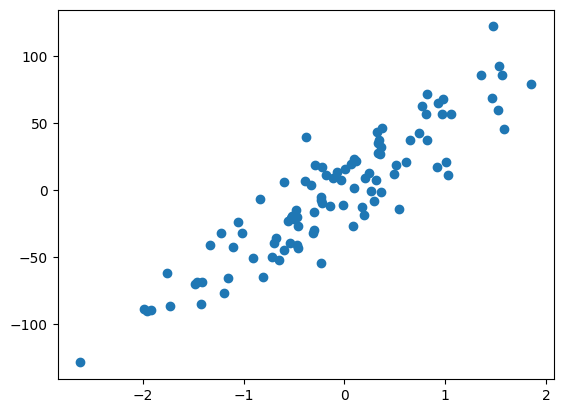

In [17]:
plt.scatter(X,y)
plt.show() # Lets plot the scatterplot for it.

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2) # Splitting the dataset

In [19]:
# Now we will get the coef and intercept to compare model performance with LinearRegression

lr = LinearRegression() #Instantiate the model

lr.fit(X_train,y_train) # Fitting the model with the training set of data

y_pred_lr = lr.predict(X_test) # Prediction using testing set

lr.coef_,lr.intercept_

(array([46.73622685]), np.float64(2.0106499165778637))

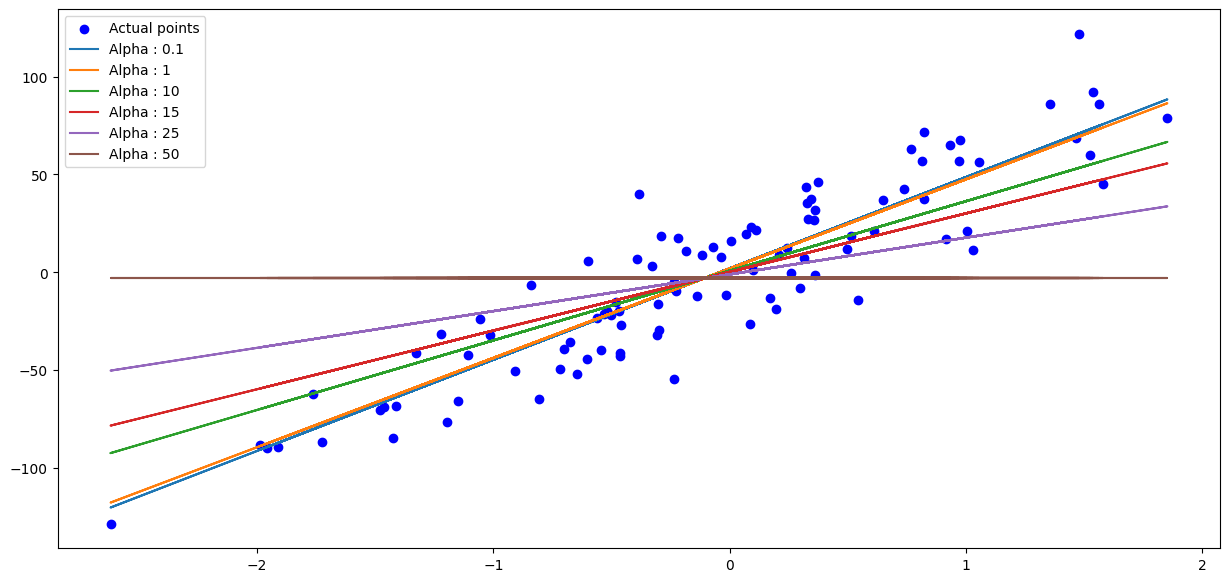

In [ ]:
# Now lets do this using Lasso
# Here we will use a number of alpha for testing so we will loop the steps 
# Also we will use an array of alphas to understand the behaviour of alpha

alphas = [0.1 , 1 , 10 , 15 , 25, 50] # Test values of alpha

# We will plot the graph outside as we dont want this to loop all over unreasonably
plt.figure(figsize=(15,7))
plt.scatter(X,y,color='blue',label='Actual points')

# Now iterating over alpha values:

for alpha in alphas:
    las = Lasso(alpha=alpha) # Instantiation with current alpha value
    las.fit(X_train,y_train) # Fit the training set 
    y_pred_las = las.predict(X_test) # Predict using Lasso model 
    plt.plot(X_test,y_pred_las , label = f"Alpha : {alpha}" ) # Note : If we want full lines we can predict with and plot with X
plt.legend()
plt.show()

# As we see in the graph below by the increase in no of alpha underfitting increases and reducing bias , but increasing variance .
# At the start the alpha value 0.1 makes the line overfit with training poitns reducing the prediction correctness.

In [31]:
# Now we will use a polynomial dataset to make predictions 
m = 100 
x1 = 5 * np.random.rand(m, 1) - 2 # Creates an array of random values of size (100,1) using the equation . 
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1) # Similar but creates a polynomial equation array unlike the above one.


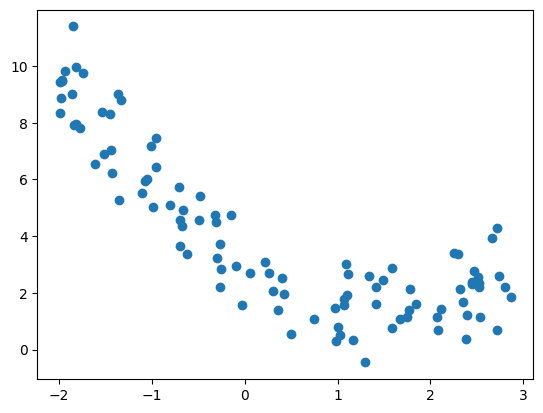

In [32]:
# Lets check this points out
plt.scatter(x1,x2)
plt.show()

c:\Users\hp\Desktop\ML\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.181e+01, tolerance: 8.312e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\hp\Desktop\ML\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.591e+02, tolerance: 8.312e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\hp\Desktop\ML\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.210e+

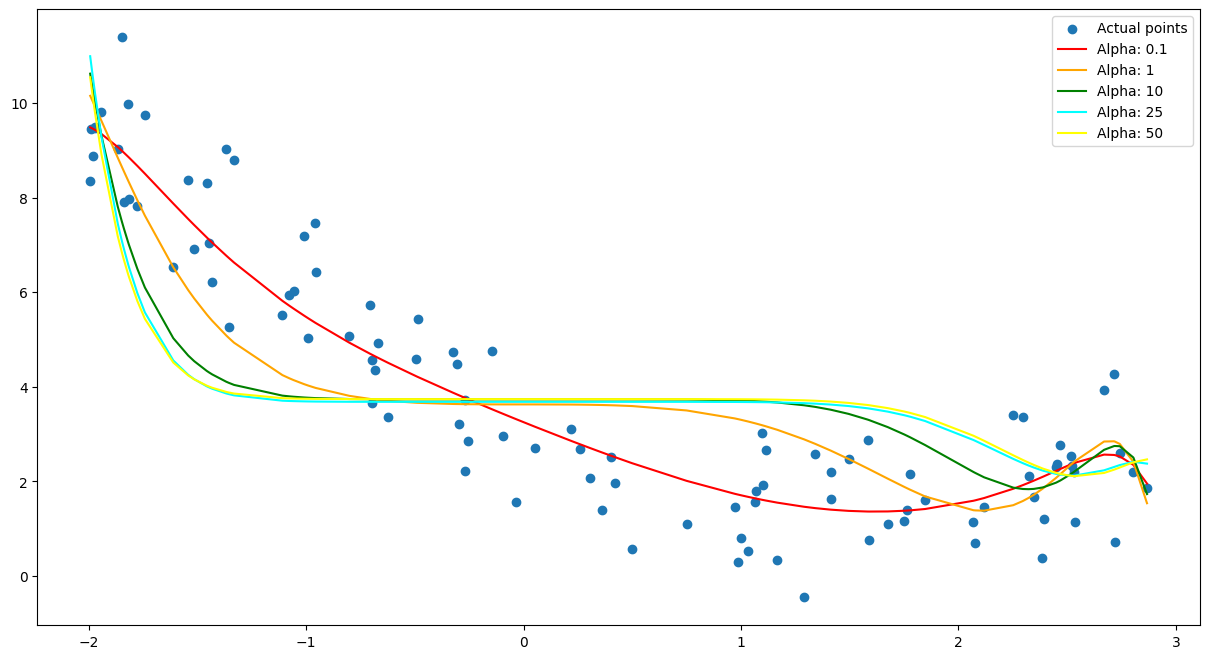

In [45]:
# Now as this is a polynomial use the PolynomialFeatures to create the dataset with the required hyperparamter value of degree.

# Now lets create a pipeline as we want to iterate and we will be using the same for loop logic but as we have a bit of jargaon , 
#  we will use pipeline to reduce the workload 

def pred_lasso(x1,x2,alpha):
    # Instantiate the pipeline
    pipe1 = Pipeline([
        ('poly' , PolynomialFeatures(degree = 16)),  # Here we keep the value 16 as the hyperparameter for each alpha
        ('las1' , Lasso(alpha = alpha)) 
        # No passing of columns as it is done in ColumnTransformer , and here we also have all numeric data . 
    ])

    # Now as we have the pipeline ready we will fit the data which was passed
    pipe1.fit(x1,x2)

    # And finally this function will return the prediction on the x1 for x2
    return ( pipe1.predict(x1) )

alphas = [0.1 , 1 , 10 , 25, 50] # Test values of alpha for Lasso
colors = ['red' , 'orange' , 'green' , 'cyan' , 'yellow'] # Colors value for alpha each

# Default graph for each alpha
plt.figure(figsize=(15,8))
plt.scatter(x1,x2,label='Actual points')

for alpha,c in zip(alphas,colors):
    prediction = pred_lasso(x1,x2,alpha) # Calling the function len(alphas) times
    plt.plot(sorted(x1[:, 0]), prediction[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()


In [ ]:
# The orange curve is the perfect alpha value and the red one is overfitting , whereas other curves are underfitting one .